# PROJECT: Predict whether a patient will have heart desease. 

dataset from https://www.kaggle.com/datasets/yasserh/heart-disease-dataset

Notebook author: Fabrizio Bernardi

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sb


Read and visualize dataset

In [18]:
df = pd.read_csv('C:/Users/Fabrizio/Desktop/datasets_ML/heart.csv')



In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
df.shape

(303, 14)

In [24]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [26]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [27]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


There are no missing values. Let's visualize data distributions and see if there are redundant (highly correlated) features

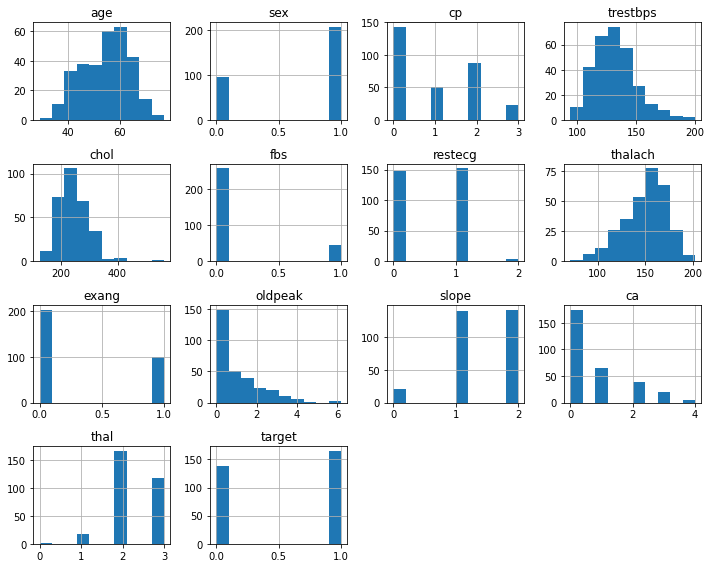

In [62]:
df.hist(figsize=(10, 8))
plt.tight_layout()  
plt.show()

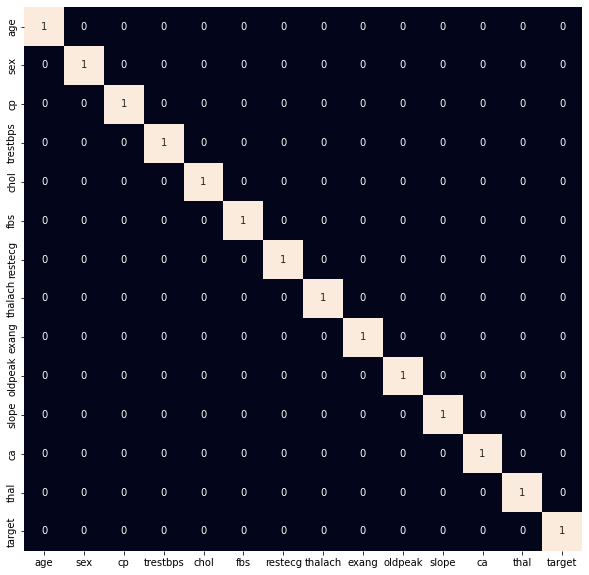

In [63]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

The targets are quite balanced and there are no highly correlated features. Let's split data into training and test and normalize them:

In [49]:
X = df.drop(columns = ['target']).values
y= df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [47]:
X_train.shape

(242, 13)

In [48]:
X_test.shape

(61, 13)

Let's train 3 different models: logistic regression, support vector machine and random forest:

In [57]:
models = [LogisticRegression(), SVC(),RandomForestClassifier()]

acc_test = []

acc_train = []


for model in models:
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    acc_train.append(accuracy_score(model.predict(X_train), y_train))

    acc_test.append(accuracy_score(predictions, y_test))
    
print(" TRAINING ACCURACY " ,acc_train)

print(" VALIDATION ACCURACY " ,acc_test)

 TRAINING ACCURACY  [0.8636363636363636, 0.9214876033057852, 1.0]
 VALIDATION ACCURACY  [0.8524590163934426, 0.8688524590163934, 0.8524590163934426]


C:\Users\Fabrizio\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


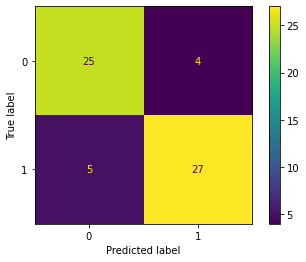

In [60]:
metrics.plot_confusion_matrix(models[0], X_test, y_test)
plt.show()


Considering the small size of the dataset, all 3 models performs quite well in recognizing heart disease